# Mask Creator GUI for pyGCxGC

This notebook demonstrates how to use the pyGCxGC Mask Creator GUI to create masks for 2D chromatograms.

In [1]:
import pyGCxGC as gcgc
import numpy as np
import matplotlib.pyplot as plt

## Loading a Chromatogram

First, let's load a sample chromatogram that we can later use with the GUI:

In [2]:
# Load an example chromatogram
Chromatogram = gcgc.parse_2D_chromatogram(
    'example_data/example_chromatograms/Example_FID.csv', 
    modulation_time=20,
    sampling_interval='infer', 
    shift=0,
    normalize='volume', 
    solvent_cutoff=0
)

# Display basic information about the chromatogram
print(f"Chromatogram: {Chromatogram.name}")
print(f"Shape: {Chromatogram.chrom_2D.shape}")
print(f"Modulation time: {Chromatogram.modulation_time} s")
print(f"Sampling interval: {Chromatogram.sampling_interval} ms")
print(f"Plot limits: {Chromatogram.limits}")

Chromatogram: Example_FID.csv
Shape: (5000, 317)
Modulation time: 20 s
Sampling interval: 4.0 ms
Plot limits: [np.float64(0.0), np.float64(105.99986666666665), np.float64(0.0), np.float64(19.996)]


## Visualizing the Chromatogram

Before using the GUI, let's visualize the chromatogram to better understand what we'll be working with:

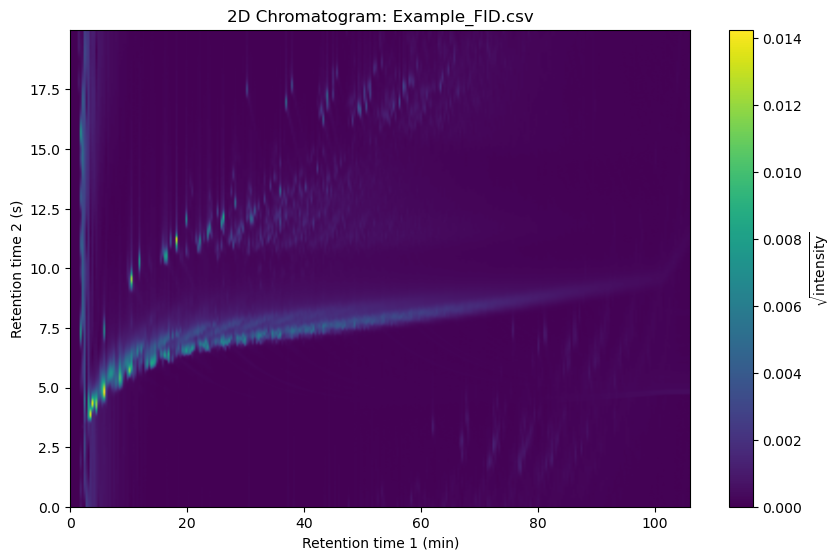

In [3]:
# Plot the chromatogram
plt.figure(figsize=(10,10/1.615))
plt.imshow(
    np.sqrt(Chromatogram.chrom_2D), 
    cmap='viridis', 
    extent=Chromatogram.limits, 
    interpolation='bilinear', 
    aspect='auto'
)
plt.xlabel('Retention time 1 (min)')
plt.ylabel('Retention time 2 (s)')
plt.colorbar(label=r'$\sqrt{\mathrm{intensity}}$')
plt.xlim(0,106)
plt.title(f'2D Chromatogram: {Chromatogram.name}')
plt.show()

## Using the Mask Creator GUI

Now we can launch the Mask Creator GUI to interactively create masks for our chromatogram.

The GUI allows you to:
1. Load a chromatogram
2. Draw regions of interest using rectangle or lasso selection tools
3. Add these selections to a mask
4. Save the mask as a .tif file for later use with pyGCxGC's masking functions

To launch the GUI, simply call:

In [4]:
# Launch the mask creator GUI
# Note: If you encounter issues with the GUI generating multiple colorbars,
# this is a known limitation in the current version
gcgc.launch_mask_creator()

## GUI Usage Instructions

Here's how to use the Mask Creator GUI:

1. **Load a Chromatogram**: Click the "Load Chromatogram File" button and select your .csv file. 
   You'll be prompted to enter the modulation time in seconds.

2. **Select a Drawing Tool**: Choose between "Rectangle" or "Lasso" tools for drawing your mask regions.

3. **Create a Selection**: 
   - With the Rectangle tool: Click and drag to create a rectangular selection
   - With the Lasso tool: Click and drag to create a free-form selection

4. **Add Selection to Mask**: After drawing a selection, click "Add Selection to Mask" to include it in your mask.

5. **Name Your Mask**: Enter a descriptive name for your mask in the "Mask Name" field.

6. **Save Your Mask**: Click "Save Mask" to export your mask as a .tif file.

7. **Navigation**: Use the toolbar at the bottom to pan, zoom, and navigate the chromatogram.

**Notes**: 
- If you notice multiple colorbars appearing, this is a known issue. Simply close and reopen the GUI to refresh the display.
- The current implementation may have some limitations with the drawing tools due to compatibility issues with certain matplotlib versions.

## Using the Created Mask

After creating and saving a mask using the GUI, you can load it and use it with your chromatogram:

In [5]:
# Example code to use a saved mask
# Replace 'path_to_mask.tif' with your actual saved mask file path
# masked_chromatogram = gcgc.mask_chromatogram(Chromatogram.chrom_2D, 'path_to_mask.tif')

# Plot the masked chromatogram
# plt.figure(figsize=(10,10/1.615))
# plt.imshow(np.sqrt(masked_chromatogram), cmap='viridis', extent=Chromatogram.limits, 
#            interpolation='bilinear', aspect='auto')
# plt.xlabel('Retention time 1 (min)')
# plt.ylabel('Retention time 2 (s)')
# plt.colorbar(label=r'$\sqrt{\mathrm{intensity}}$')
# plt.xlim(0,106)
# plt.title('Masked Chromatogram')
# plt.show()

## Alternative: Programmatic Creation of Masks

If you're experiencing issues with the GUI, you can also create masks programmatically. Here's an example:

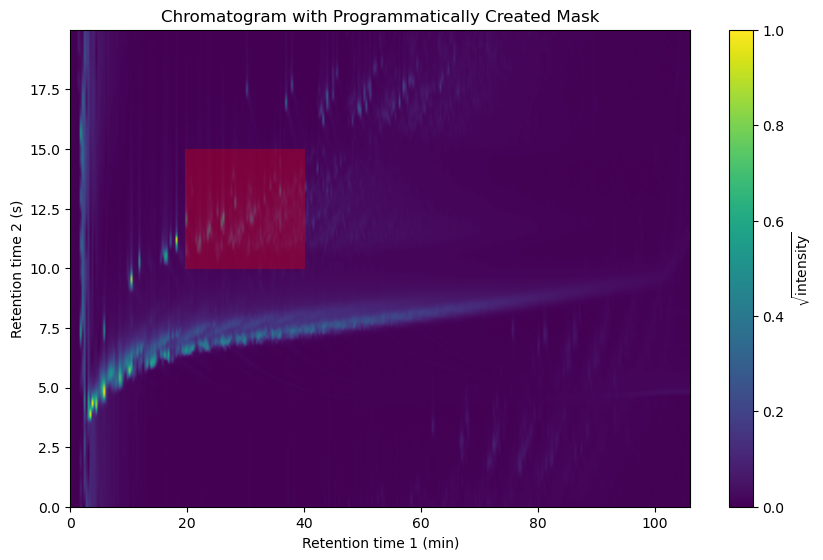

Mask saved to: example_data/example_masks/Programmatic_Mask.tif
Integrated value of the masked region: 0.056360


In [6]:
# Create a mask programmatically (without the GUI)
# First, create an empty mask with the same dimensions as the chromatogram
mask = np.zeros_like(Chromatogram.chrom_2D, dtype=np.uint8)

# Define a region of interest (example: a rectangle)
# Parameters: x_min, y_min, x_max, y_max in data coordinates
def create_rectangular_mask(chromatogram, x_min, y_min, x_max, y_max):
    mask = np.zeros_like(chromatogram.chrom_2D, dtype=np.uint8)
    
    # Convert data coordinates to array indices
    x_range = chromatogram.limits[1] - chromatogram.limits[0]
    y_range = chromatogram.limits[3] - chromatogram.limits[2]
    
    x_min_idx = int((x_min - chromatogram.limits[0]) / x_range * chromatogram.chrom_2D.shape[1])
    y_min_idx = int((y_min - chromatogram.limits[2]) / y_range * chromatogram.chrom_2D.shape[0])
    x_max_idx = int((x_max - chromatogram.limits[0]) / x_range * chromatogram.chrom_2D.shape[1])
    y_max_idx = int((y_max - chromatogram.limits[2]) / y_range * chromatogram.chrom_2D.shape[0])
    
    # Clip to valid indices
    x_min_idx = max(0, min(x_min_idx, chromatogram.chrom_2D.shape[1]-1))
    y_min_idx = max(0, min(y_min_idx, chromatogram.chrom_2D.shape[0]-1))
    x_max_idx = max(0, min(x_max_idx, chromatogram.chrom_2D.shape[1]-1))
    y_max_idx = max(0, min(y_max_idx, chromatogram.chrom_2D.shape[0]-1))
    
    # Make sure min <= max
    x_min_idx, x_max_idx = min(x_min_idx, x_max_idx), max(x_min_idx, x_max_idx)
    y_min_idx, y_max_idx = min(y_min_idx, y_max_idx), max(y_min_idx, y_max_idx)
    
    # Set the region to 1
    mask[y_min_idx:y_max_idx+1, x_min_idx:x_max_idx+1] = 1
    
    return mask

# Create a mask for a specific region (for example: 20-40 min in x, 5-10 s in y)
mask = create_rectangular_mask(Chromatogram, 20, 5, 40, 10)

# Visualize the mask overlaid on the chromatogram
plt.figure(figsize=(10,10/1.615))
plt.imshow(np.sqrt(Chromatogram.chrom_2D), cmap='viridis', 
           extent=tuple(Chromatogram.limits), interpolation='bilinear', aspect='auto')

# Create a color overlay for the mask
mask_overlay = np.zeros((Chromatogram.chrom_2D.shape[0], Chromatogram.chrom_2D.shape[1], 4))
mask_overlay[mask == 1] = [1, 0, 0, 0.3]  # Red with alpha=0.3
plt.imshow(mask_overlay, extent=tuple(Chromatogram.limits), interpolation='nearest', aspect='auto')

plt.xlabel('Retention time 1 (min)')
plt.ylabel('Retention time 2 (s)')
plt.colorbar(label=r'$\sqrt{\mathrm{intensity}}$')
plt.xlim(0,106)
plt.title('Chromatogram with Programmatically Created Mask')
plt.show()

# Save the mask to a TIFF file
import tifffile
mask_path = 'example_data/example_masks/Programmatic_Mask.tif'
tifffile.imwrite(mask_path, mask * 255)  # Multiply by 255 to get a standard binary mask

print(f"Mask saved to: {mask_path}")

# Apply the mask to the chromatogram
masked_chromatogram = Chromatogram.chrom_2D * mask

# Integrate the masked region
from scipy.integrate import trapezoid

def integrate_2d_array(array_2d):
    # Integrate along rows
    row_integrated = trapezoid(array_2d, axis=0)
    # Integrate the row-integrated result
    result = trapezoid(row_integrated)
    return result

integrated_value = integrate_2d_array(masked_chromatogram)
print(f"Integrated value of the masked region: {integrated_value:.6f}")

## Integrating Masked Regions

Once you have created masks for different regions of interest, you can integrate them:

In [7]:
# Example code to integrate multiple masks
# If you have multiple masks in a folder, you can integrate them all at once:
# results = gcgc.integrate_masks(
#     Chromatogram.chrom_2D, 
#     masks='path_to_masks_folder/',
#     mask_names='infer'
# )

# Display the results as a DataFrame
# import pandas as pd
# results_df = pd.DataFrame([results], index=['Sample 1'])
# results_df